### Take a general look at the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,R_yn,sql_yn,tableau_yn,spark_yn,aws_yn,excel_yn,phd_yn,masters_yn,bachelors_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,1,0,0,1,1,1,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,0,0,1,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,1,0,1,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,0,0,0,1,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,1,0,0,0,1,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'phd_yn',
       'masters_yn', 'bachelors_yn'],
      dtype='object')

Our final goal is to predict a job's salary based on other variables.

### Additional feature engineering

In [5]:
## Clean up job title and seniority
df['Job Title'].value_counts()

Data Scientist                                                       131
Data Engineer                                                         53
Senior Data Scientist                                                 34
Data Analyst                                                          15
Senior Data Engineer                                                  14
                                                                    ... 
Data Scientist, Senior                                                 1
Principal Machine Learning Scientist                                   1
Associate Scientist / Sr. Associate Scientist, Antibody Discovery      1
Associate Data Scientist/Computer Scientist                            1
Web Data Analyst                                                       1
Name: Job Title, Length: 264, dtype: int64

In [6]:
# functions to clean up the job title and seniority
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [9]:
##  Fix entries with state 'Los Angeles' or 'LA' to 'CA'
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 KY               6
 MI               6
 GA               6
 DE               6
 IA               5
 CT               5
 LA               4
 NE               4
 OR               4
 NM               3
 KS               3
 ID               2
 MN               2
 SC               1
 RI               1
 Los Angeles      1
Name: job_state, dtype: int64

In [10]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
MO      9
AZ      9
AL      8
DE      6
MI      6
GA      6
KY      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [11]:
##  Create a new variable: length of job description 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [12]:
## Create a new variable: competitor count
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [14]:
## Convert hourly wage to annual wage
# To get annual, we need to multiply hourly by 2000 because 2000 = 8 hrs/day * 5 days/week * 50 work weeks/year
# But remember the rest of the annual salaries are already in thousands 
# So multiply by 2 to get annual wage in thousands
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [15]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [16]:
## Remove new line from company txt
df.company_txt

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [17]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

### Look at the distributions and correlations of our numerical predictor variables

In [18]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,...,sql_yn,tableau_yn,spark_yn,aws_yn,excel_yn,phd_yn,masters_yn,bachelors_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,...,0.512129,0.199461,0.225067,0.237197,0.522911,0.273585,0.943396,0.663073,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,...,0.500190,0.399865,0.417908,0.425651,0.499812,0.446099,0.231240,0.472979,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'phd_yn',
       'masters_yn', 'bachelors_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [20]:
df_num = df[['Rating','age','desc_len','num_comp']]

#### Histograms  
Let's look at the distributions of our numeric variables

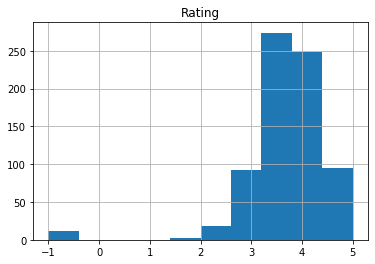

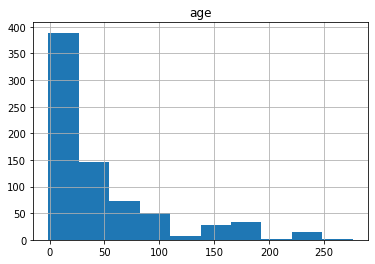

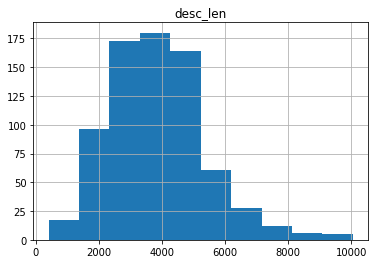

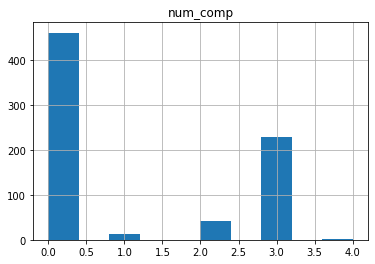

In [21]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.grid()
    plt.show()

From the histograms, 'rating', 'age' and 'num_comp' do not follow a normal distribution. So we might need to normalize these variables before putting them in our model.

#### Boxplots

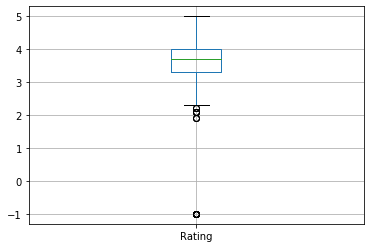

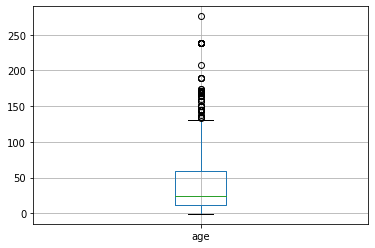

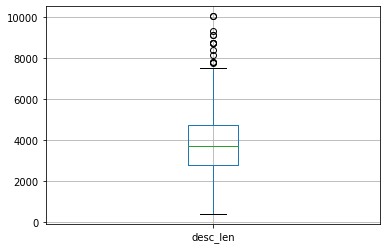

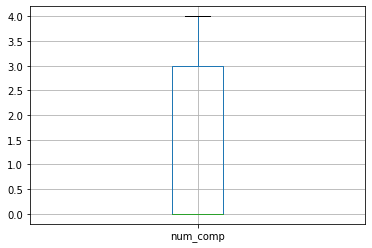

In [22]:
for i in df_num.columns:
    df_num.boxplot(column = i)
    plt.show()

From the boxplots, we have quite a lot of high outliers in age and average salary, and a few low outliers in rating.

#### Correlation Matrix and Plot

In [23]:
df[['avg_salary','Rating','age','desc_len','num_comp']].corr()

,avg_salary,Rating,age,desc_len,num_comp
avg_salary,1.000000,0.013492,0.019655,0.078808,0.093813
Rating,0.013492,1.000000,0.021655,-0.012281,0.027190
age,0.019655,0.021655,1.000000,0.163911,0.126687
desc_len,0.078808,-0.012281,0.163911,1.000000,0.104620
num_comp,0.093813,0.027190,0.126687,0.104620,1.000000


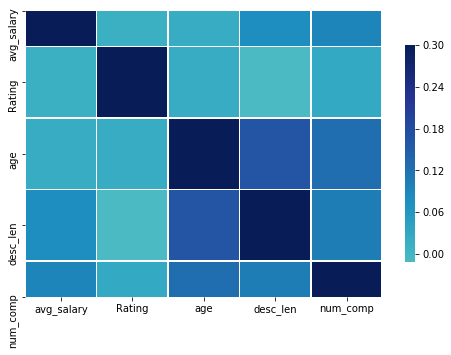

In [24]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[['avg_salary','Rating','age','desc_len','num_comp']].corr(), cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix, none of the numeric predictor variables have a moderate or strong correlation to average salary, indicating that these predictor variables have very little effect on revenue. We will investigate this claim further when we fit models to our data.    
Also, there are no two predictor variables that are highly correlated (corr > 0.7) with each other. This is a good sign that our predictor variables are independent.  
  
From the heatmap, we can see that a company's age has some correlation with its job description length and its number of competitors. Good to keep in mind.


## Categorical Variables

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'phd_yn',
       'masters_yn', 'bachelors_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 
   'Revenue', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'phd_yn',
       'masters_yn', 'bachelors_yn', 'job_simp', 'seniority']]

graph for Location: total = 200


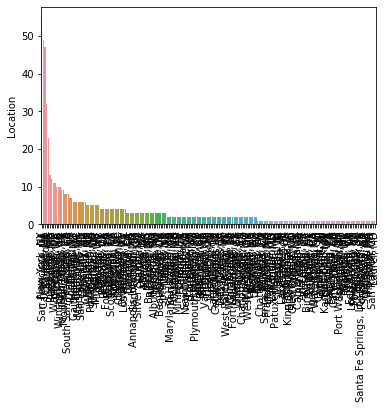

graph for Headquarters: total = 198


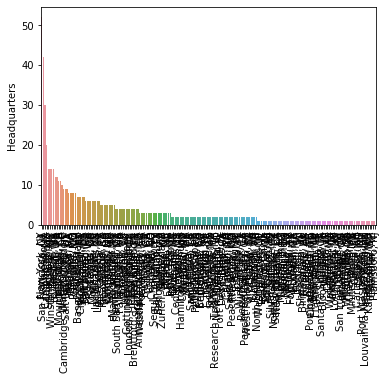

graph for Size: total = 9


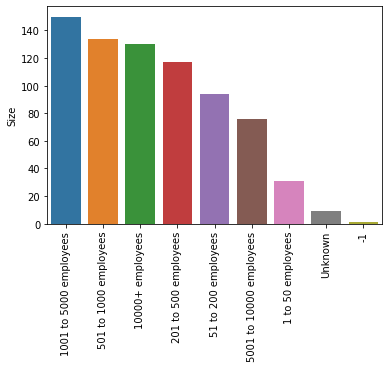

graph for Type of ownership: total = 11


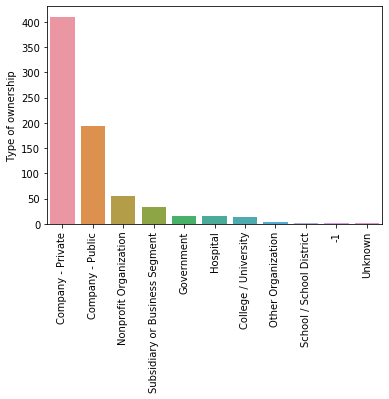

graph for Industry: total = 60


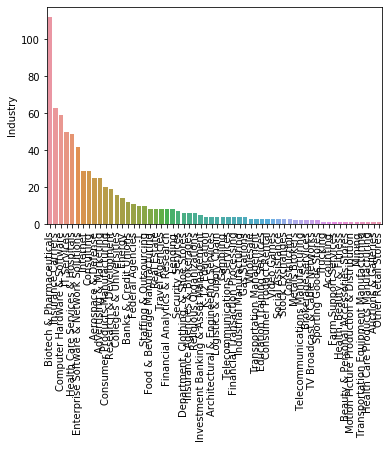

graph for Sector: total = 25


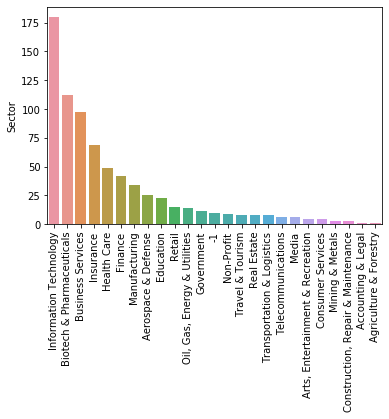

graph for Revenue: total = 14


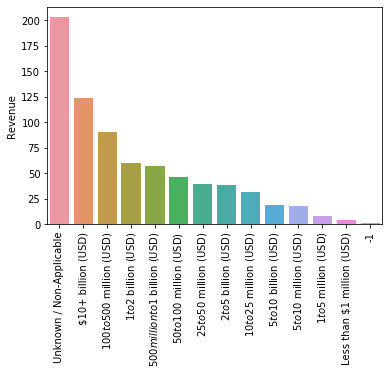

graph for company_txt: total = 343


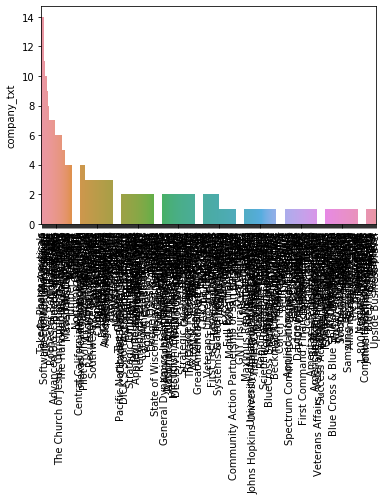

graph for job_state: total = 37


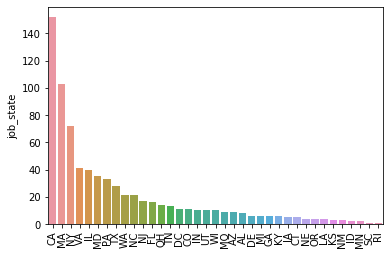

graph for same_state: total = 2


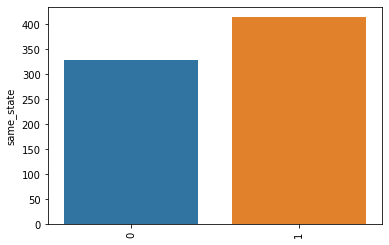

graph for python_yn: total = 2


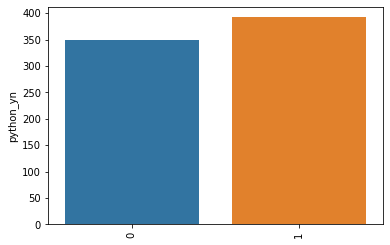

graph for R_yn: total = 2


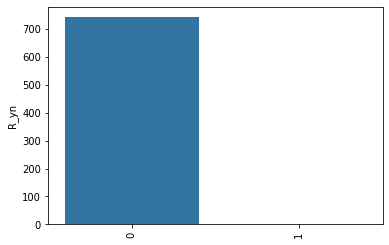

graph for sql_yn: total = 2


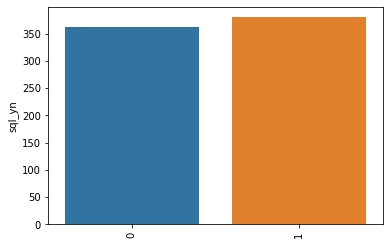

graph for tableau_yn: total = 2


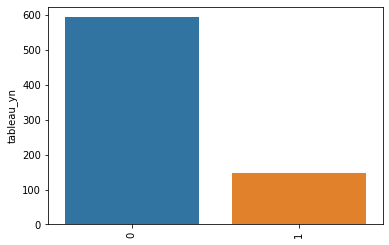

graph for spark_yn: total = 2


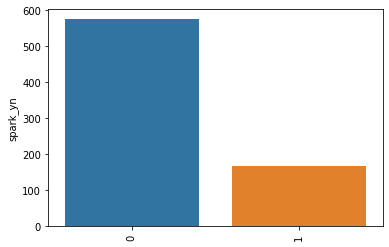

graph for aws_yn: total = 2


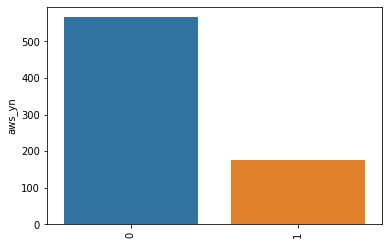

graph for excel_yn: total = 2


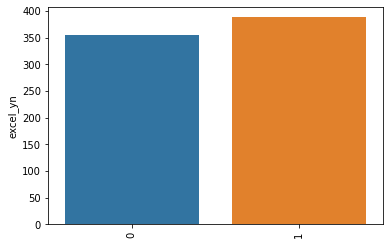

graph for phd_yn: total = 2


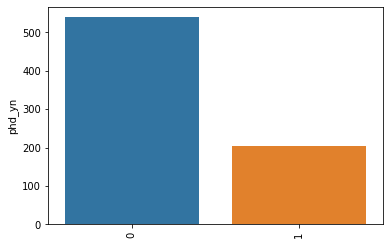

graph for masters_yn: total = 2


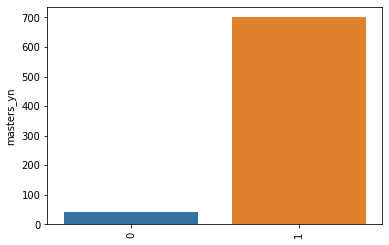

graph for bachelors_yn: total = 2


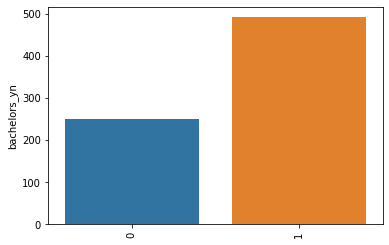

graph for job_simp: total = 7


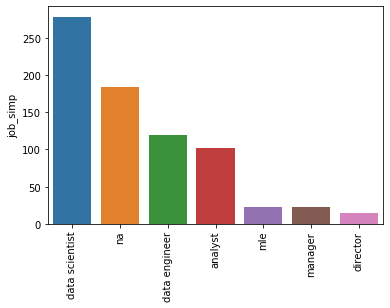

graph for seniority: total = 3


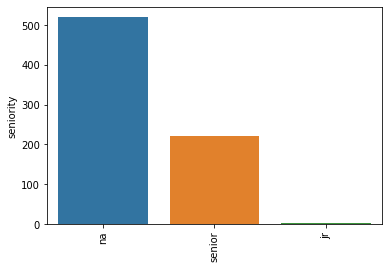

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


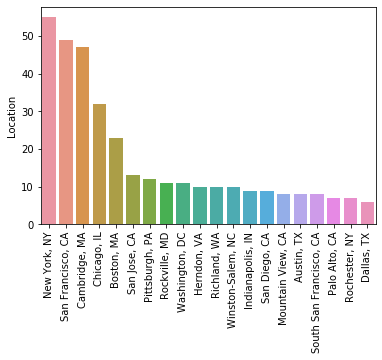

graph for Headquarters: total = 20


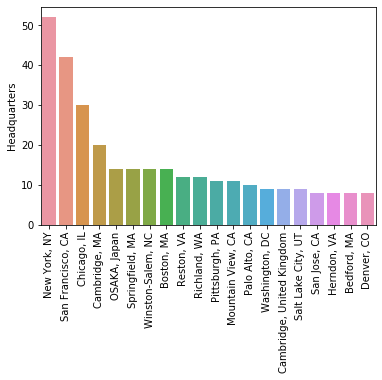

graph for company_txt: total = 20


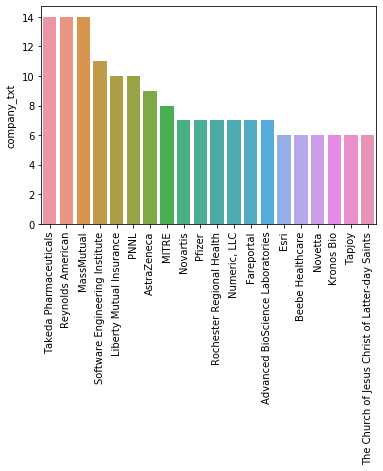

In [28]:
# look at top 20 values for graphs that were squashed in previous graphic
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## How do our predictor variables affect a job's salary?

First let's take a look at our average salary column.

In [29]:
df.avg_salary.describe()

count    742.000000
mean     100.626011
std       38.855948
min       13.500000
25%       73.500000
50%       97.500000
75%      122.500000
max      254.000000
Name: avg_salary, dtype: float64

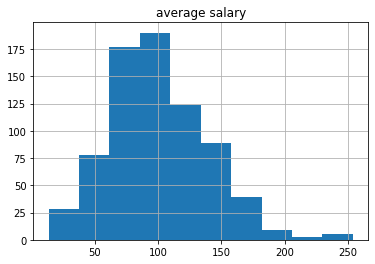

In [30]:
plt.hist(df['avg_salary'])
plt.title('average salary')
plt.grid()
plt.show()

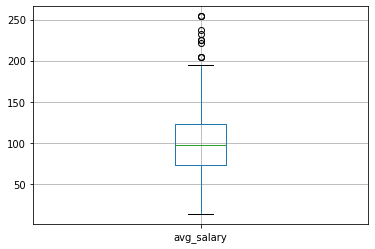

In [31]:
df.boxplot(column = 'avg_salary')

Average salary is nicely normally distributed, with some high outliers of over $200K.

### Pivot tables  
It might be interesting to look at numeric summaries of categorical variables and how they affect salary. For instance, the job level/seniority and education level required likely significantly affect the job salary.

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'phd_yn',
       'masters_yn', 'bachelors_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [33]:
# average salaries for different job positions within the data science field
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary').sort_values(by = 'avg_salary', ascending= False)

,avg_salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843


In [34]:
# salary based on job position and job level 
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

It's interesting to note that on average, managers are being paid less than junior level data scientists and junior data engineers, even though managers typically require more years of experience.

In [35]:
# what education level is required for different job positions?
pd.pivot_table(df, index = 'job_simp', values = ['phd_yn', 'masters_yn', 'bachelors_yn'])

,bachelors_yn,masters_yn,phd_yn
job_simp,,,
analyst,0.862745,0.941176,0.000000
data engineer,0.773109,0.966387,0.058824
data scientist,0.551971,0.960573,0.333333
director,0.714286,1.000000,0.642857
manager,0.636364,1.000000,0.000000
mle,0.681818,1.000000,0.454545
na,0.646739,0.885870,0.456522


From the pivot table above, we can see that none of the analyst or manager job postings require a PhD. Additionally, data science job recruiters across the board prefer Master's degree holders over Bachelor's degree holders.

In [36]:
# average salary of various job titles that specifically mention bachelor's in their job desc
print("bachelor's degree required")
pd.pivot_table(df[df.bachelors_yn == 1], index = 'job_simp', values = 'avg_salary').sort_values('avg_salary', ascending = False) 

bachelor's degree required


,avg_salary
job_simp,
director,142.650000
mle,119.900000
data scientist,113.477273
data engineer,105.451087
manager,87.107143
na,82.058824
analyst,67.028409


In [37]:
print("master's degree required")
pd.pivot_table(df[df.bachelors_yn == 1], index = 'job_simp', values = 'avg_salary').sort_values('avg_salary', ascending = False) 

master's degree required


,avg_salary
job_simp,
director,142.650000
mle,119.900000
data scientist,113.477273
data engineer,105.451087
manager,87.107143
na,82.058824
analyst,67.028409


In [38]:
print("PhD required")
pd.pivot_table(df[df.phd_yn == 1], index = 'job_simp', values = 'avg_salary').sort_values('avg_salary', ascending = False) 

PhD required


,avg_salary
job_simp,
director,184.000000
data engineer,146.714286
mle,134.200000
data scientist,126.811828
na,99.380952


From the previous three pivot tables, we can see that jobs that require higher educaion level offer higher salaries.

In [39]:
# salary of all data science jobs in each state
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


Job seekers looking for data science positions would get higher salary offers in California, Illinois and Washington DC, to name a few. However, it is important to note the costs of living differs in each state. For instance, Illinois has a lower cost of living compared to California. So, although you might get a higher salary job offer in California, you might enjoy a better quality of life accepting a lower salary job in Illinois and living there. 

In [40]:
# count of data science job openings in each state
pd.pivot_table(df, index = 'job_state', values = 'avg_salary', aggfunc='count').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,152
MA,103
NY,72
VA,41
IL,40
MD,35
PA,33
TX,28
WA,21


In [41]:
# amount of data science job openings in each state
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pt_state = pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state')
pt_state.columns = ['count of job openings']
pt_state

count of job openings
job_state job_simp                             
AL        analyst                             5
          data engineer                       1
          na                                  2
AZ        analyst                             1
          data engineer                       5
          data scientist                      1
          na                                  2
CA        mle                                 5
          manager                             9
          na                                 27
          data engineer                      25
          analyst                            18
          data scientist                     68
CO        analyst                             1
          data engineer                       3
          data scientist                      3
          mle                                 1
          na                                  3
CT        data scientist                      2
          na                                  3
DC        analyst                             2
          data engineer                       4
          data scientist                      5
DE        na                                  6
FL        data engineer                       3
          data scientist                      7
          analyst                             6
GA        data scientist                      3
          na                                  3
IA        analyst                             2
          data engineer                       3
ID        analyst                             2
IL        na                                  6
          analyst                             3
          data engineer                       8
          data scientist                     15
          director                            6
          mle                                 2
IN        na                                  4
          data scientist                      2
          data engineer                       4
KS        mle                                 3
KY        data scientist                      2
          na                                  4
LA        analyst                             1
          data engineer                       2
          na                                  1
MA        manager                             5
          director                            6
          na                                 46
          data engineer                      12
          analyst                             4
          data scientist                     30
MD        data scientist                     13
          na                                 16
          analyst                             3
          data engineer                       3
MI        data scientist                      4
          manager                             2
MN        analyst                             1
          data engineer                       1
MO        analyst                             2
          data scientist                      3
          manager                             1
          na                                  3
NC        data engineer                       6
          data scientist                      3
          na                                 12
NE        na                                  4
NJ        na                                  1
          manager                             2
          director                            2
          data engineer                       2
          data scientist                      4
          analyst                             6
NM        data scientist                      3
NY        analyst                            14
          data engineer                       4
          data scientist                     40
          mle                                 2
          na                                 12
OH        na                              

In [42]:
# average salary of data scientists specifically in each state
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False) 

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [43]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 
                'python_yn', 'R_yn','sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'phd_yn',
                'masters_yn', 'bachelors_yn', 'Type of ownership', 'avg_salary']]

In [44]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Br

- In general, companies with higher ratings tend to offer higher salaries for data science positions      
- Companies in the tech, finance and research industries tend to offer higher salaries    
- Companies in the media, tech and finance sectors tend to offer higher salaries than travel, arts and agriculture  
- Interestingly, companies with lower revenue tend to offer higher salaries   
- The number of competitors a company has does not substantially affect salary  
- Companies that pay hourly tend to offer lower annual salaries than their counterparts  
- If a job description explicitly mentions python, sql, spark or aws, the offered salary tends to be higher. However, the presence of other skills R, tableau and excel in a job description are associated with lower salaries. This could be due to the second set of skills being needed for generally lower paying jobs like data analyst  
- Job openings that require PhD or Master's degrees tend to offer higher salaries than Bachelor's degrees  
- Public owned companies tend to offer higher salaries than private owned and government owned     


### Word cloud to see the most common words listed in data science job descriptions

In [45]:
# pip install wordcloud

In [46]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

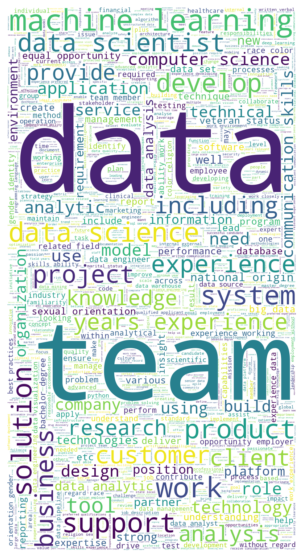

In [47]:
words = " ".join(df['Job Description'])

# function to remove punctuation and stop words
def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Some of the most prominent keywords are data and team, followed by: machine learning, develop, product, project, solution, business, and support. 

In [48]:
df.to_csv('eda_data.csv', index = False)